In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import sklearn

In [103]:
def function1(l,t,a,b,c):
    l1,l2,l3 = l.tolist()
    return a*(l2-l1),l1*(c-l3)-l2,l1*l2-b*l3

a = 10
b = 8/3
c = 20
# c = 28
t = np.linspace(-100,1000,110001)
# y0 = np.array([0,0,1])
y0 = np.array([1,2,3])
y1 = integrate.odeint(function1,y0,t,args=(a,b,c))
y2 = y1[10000:]
y1

array([[ 1.        ,  2.        ,  3.        ],
       [ 1.10268373,  2.15818343,  2.94262469],
       [ 1.21146181,  2.33332217,  2.89082995],
       ...,
       [-7.11805217, -7.11805217, 19.        ],
       [-7.11805217, -7.11805217, 19.        ],
       [-7.11805217, -7.11805217, 19.        ]])

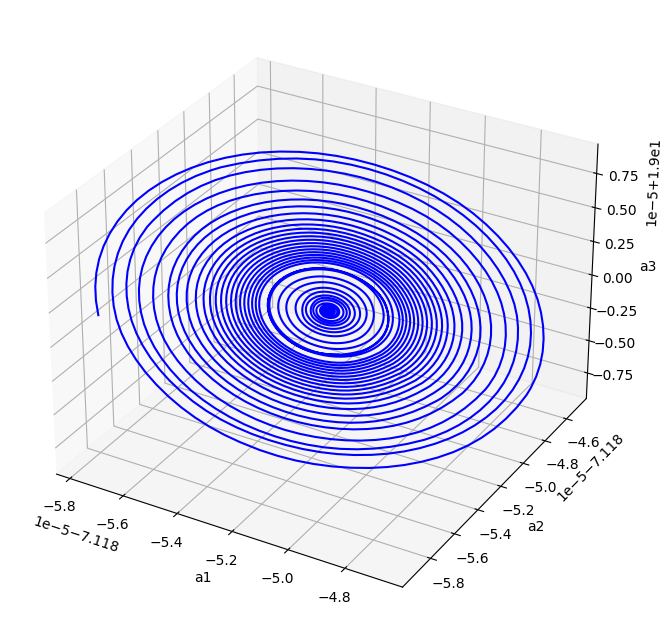

In [104]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
# ax.plot(y1[:,0],y1[:,1],y1[:,2],color='b')
ax.plot(y2[:,0],y2[:,1],y2[:,2],color='b')
plt.xlabel('a1')
plt.ylabel('a2')
ax.set_zlabel('a3')
plt.show()

In [105]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()
y2 = scaler.fit_transform(y2)

# Define the autoencoder architecture
input_layer = Input(shape=(3,))
encoded = Dense(2, activation='relu')(input_layer)  # 2-dimensional encoding (dimensionality reduction)
decoded = Dense(3, activation='sigmoid')(encoded)  # Output matches the input dimensions

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(y2, y2, epochs=20, batch_size=16, shuffle=True)

# Encode the data using the trained autoencoder
encoded_data = autoencoder.predict(y2)

encoded_data = scaler.inverse_transform(encoded_data)

Epoch 1/20
6251/6251 [==============================] - 4s 629us/step - loss: 4.9611e-04
Epoch 2/20
6251/6251 [==============================] - 4s 610us/step - loss: 2.8748e-04
Epoch 3/20
6251/6251 [==============================] - 4s 613us/step - loss: 2.6978e-04
Epoch 4/20
6251/6251 [==============================] - 4s 621us/step - loss: 2.6533e-04
Epoch 5/20
6251/6251 [==============================] - 4s 618us/step - loss: 2.6310e-04
Epoch 6/20
6251/6251 [==============================] - 4s 709us/step - loss: 2.6199e-04
Epoch 7/20
6251/6251 [==============================] - 4s 697us/step - loss: 2.6112e-04
Epoch 8/20
6251/6251 [==============================] - 4s 681us/step - loss: 2.6072e-04
Epoch 9/20
6251/6251 [==============================] - 4s 680us/step - loss: 2.6041e-04
Epoch 10/20
6251/6251 [==============================] - 5s 761us/step - loss: 2.6013e-04
Epoch 11/20
6251/6251 [==============================] - 5s 747us/step - loss: 2.5995e-04
Epoch 12/20
6251/62

In [107]:
encoded_data

array([[-7.1180563, -7.118057 , 19.000006 ],
       [-7.1180563, -7.118057 , 19.000006 ],
       [-7.1180563, -7.118057 , 19.000006 ],
       ...,
       [-7.118052 , -7.1180525, 19.       ],
       [-7.118052 , -7.1180525, 19.       ],
       [-7.118052 , -7.1180525, 19.       ]], dtype=float32)

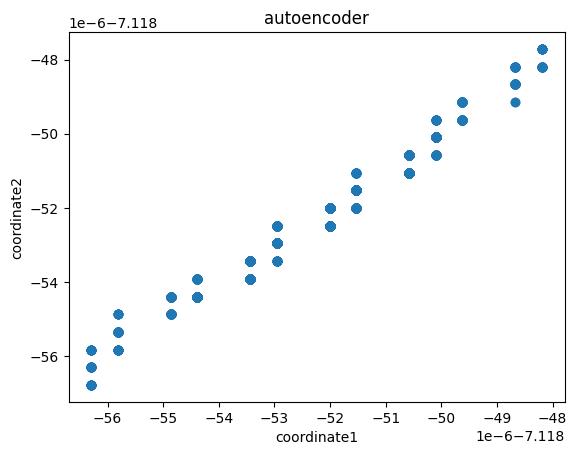

In [108]:
fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
ax2.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.title('autoencoder')
plt.xlabel('coordinate1')
plt.ylabel('coordinate2')
plt.show()